# Занятие 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([5, 1, 5, ..., 4, 3, 4])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1661 1629 1762 1632 1688 1628]
[0.1661 0.1629 0.1762 0.1632 0.1688 0.1628]
[1 2 3 4 5 6]
1.0


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
    print("{}: {} {}".format(N, counts/N, np.sum(counts/N)))

[1 3 4 5 6]
10: [0.1 0.3 0.2 0.2 0.2] 1.0
[1 2 3 4 5 6]
100: [0.17 0.2  0.18 0.25 0.07 0.13] 1.0
[1 2 3 4 5 6]
1000: [0.157 0.184 0.153 0.157 0.167 0.182] 1.0
[1 2 3 4 5 6]
10000: [0.1603 0.165  0.1668 0.1702 0.1682 0.1695] 1.0
[1 2 3 4 5 6]
100000: [0.16625 0.16665 0.1652  0.16896 0.16772 0.16522] 1.0


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [6]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
#sample

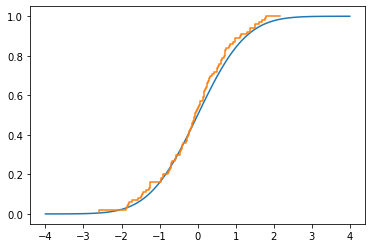

In [7]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 1.  5.  9.  9. 16. 25. 17.  8.  6.  4.]


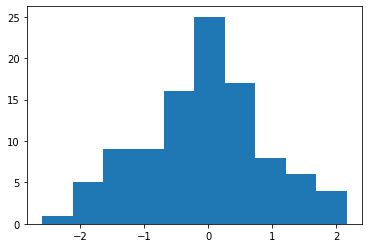

In [8]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample)
print(b)

In [9]:
n

array([-2.5990225 , -2.12279507, -1.64656763, -1.1703402 , -0.69411277,
       -0.21788533,  0.2583421 ,  0.73456953,  1.21079697,  1.6870244 ,
        2.16325184])

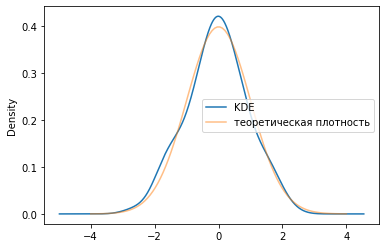

In [10]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [11]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([-1.16769419, -1.20207687, -2.08565679, -0.05388961,  0.90777385,
        0.832575  ,  0.69996741,  1.06578461,  1.3868998 ,  1.15358933,
        2.53691944, -0.55122662, -0.44017673,  1.95247733,  1.95900358,
       -1.26349147,  0.1655714 , -1.4319222 , -1.35565469,  0.1474403 ,
       -1.91086093,  0.06078452, -0.08935587,  0.0973984 ,  0.70653453,
       -1.68356506,  1.31193845, -0.60054364,  0.55299934, -0.06761459,
       -2.01427772,  3.1519799 ,  1.04251691, -0.37846828, -0.27717862,
       -0.76852226,  0.39142024,  0.41813406,  0.94135264,  1.39559208,
        0.91761053, -0.1986841 ,  0.67697883,  0.42716587,  0.05664714,
       -1.5134014 , -0.26513481, -1.58253695, -0.42181705,  0.99752568,
        0.70922163,  0.59718018, -1.17482205, -0.25743517,  0.86859196,
       -0.83952963,  1.28859094,  1.10358631, -0.80418929, -0.43999277,
        1.80815632, -0.81013709,  1.42999318, -0.49143695, -0.75219135,
        1.07392391,  0.53627341,  1.84040179, -0.04012838,  0.21

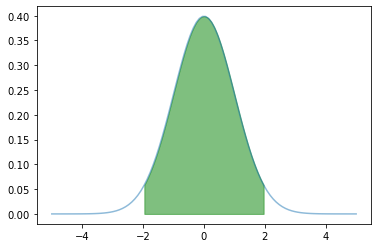

In [12]:
x = np.linspace(-5,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [13]:
norm_rv.pdf(-1.96)

0.058440944333451476

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [14]:
norm_rv.pdf(0.25)

0.3866681168028493

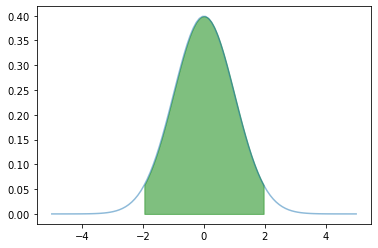

In [15]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Интервал для N 10 4.165 ... 15.322
Интервал для N 50 4.627 ... 9.616
Интервал для N 100 4.736 ... 8.264
Интервал для N 1000 4.917 ... 6.032
Интервал для N 10000 4.974 ... 5.326


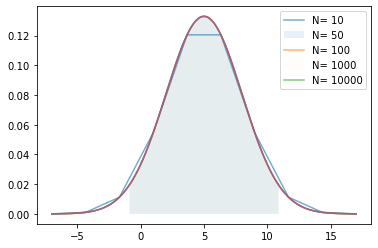

In [16]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 3
norm_rv = sts.norm(mu, sigma)
alpha = 0.05
N = [10, 50, 100, 1000, 10000]
#colors = ['cyan', "purple", "orange", "yellow"]
for n in N:
    sample = np.linspace(-7, 17, n)
    pdf = norm_rv.pdf(sample)
    plt.plot(sample, pdf, alpha = .6)
    q_a_m = norm_rv.ppf(alpha/2)
    q_a_p = norm_rv.ppf(1 - alpha/2)
    to_fill = np.linspace(q_a_m, q_a_p, 100)
    plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha = 1/n)
    plt.legend([" ".join(("N=", str(n))) for n in N])
    print ("Интервал для N %.f %.3f ... %.3f" % (n, sample.mean() + q_a_m * sigma/np.sqrt(n) ,#!!! + т.к. q_a_m отрицательное
                                                sample.mean() + q_a_p * sigma/np.sqrt(n)))

Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

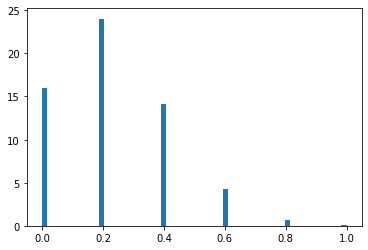

In [17]:
p=.23
ber_rv = sts.bernoulli(p)
ber_rv.rvs(20)
N = 5
NN = 100000
# сгенерируем много выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(ber_rv.rvs(N)))
plt.hist(means, density=True, bins='auto');

In [18]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.72650615, 2.0371846 , 1.43017497, 3.97066472, 1.40813138,
       2.9997247 , 1.19032711, 1.44196976, 1.63929345, 1.20396761])

In [19]:
N = 2
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

(array([0.0797664 , 0.17092799, 0.22790399, 0.30767038, 0.43871517,
        0.39313438, 0.47859837, 0.57545757, 0.64952636, 0.62103836,
        0.53557437, 0.34755358, 0.29627518, 0.33615838, 0.14813759,
        0.09116159]),
 array([1.06358614, 1.23909865, 1.41461116, 1.59012366, 1.76563617,
        1.94114868, 2.11666118, 2.29217369, 2.4676862 , 2.6431987 ,
        2.81871121, 2.99422372, 3.16973622, 3.34524873, 3.52076124,
        3.69627374, 3.87178625]),
 <BarContainer object of 16 artists>)

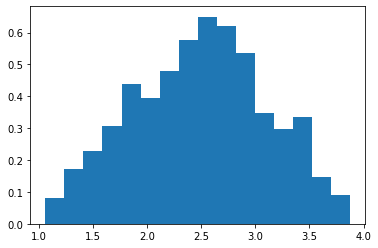

In [20]:
plt.hist(means, density=True, bins='auto')

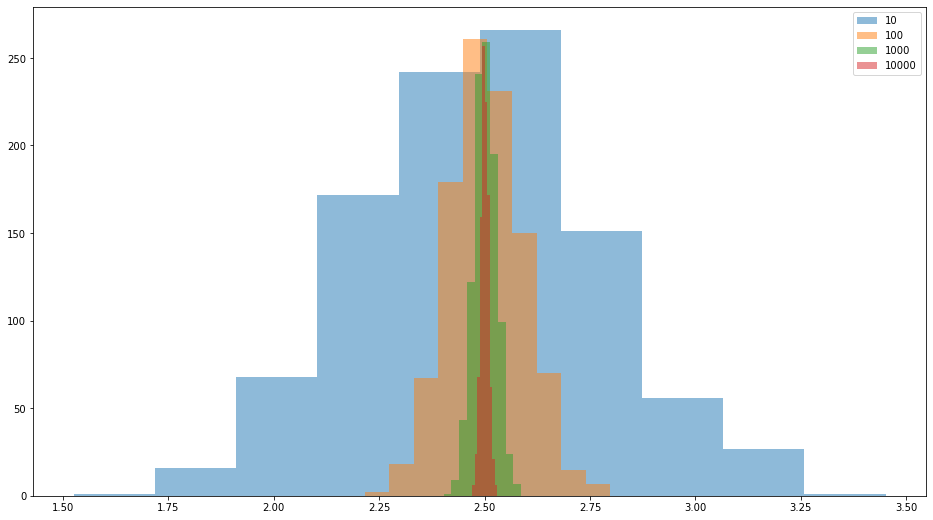

In [21]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(uniform_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [22]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [23]:
uniform_rv.mean()

2.5

In [24]:
uniform_rv.var()

0.75

In [25]:
uniform_rv.std()

0.8660254037844386

[]

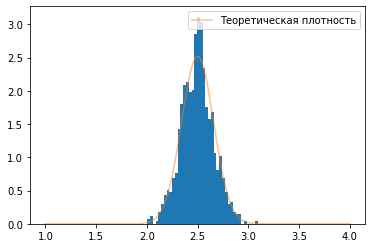

In [26]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [27]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * uniform_rv.std() / np.sqrt(N-1), np.mean(data) + 1.96 * uniform_rv.std() / np.sqrt(N-1) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N-1)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.054448408470728, 2.684850578955351] 
Доверительный интервал для среднего по цпт интервальная оценка: (2.077264968246546, 2.6620340191795333) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (2.319273946392576, 2.4200250410335036) 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [28]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 7,  7,  7,  5, 10,  8,  7, 10,  5, 11])

Text(0.5, 0, '$x$')

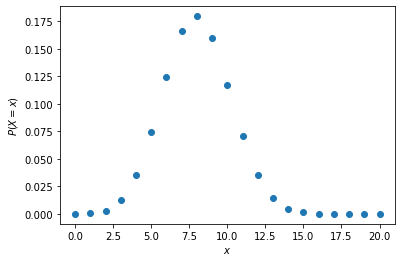

In [29]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

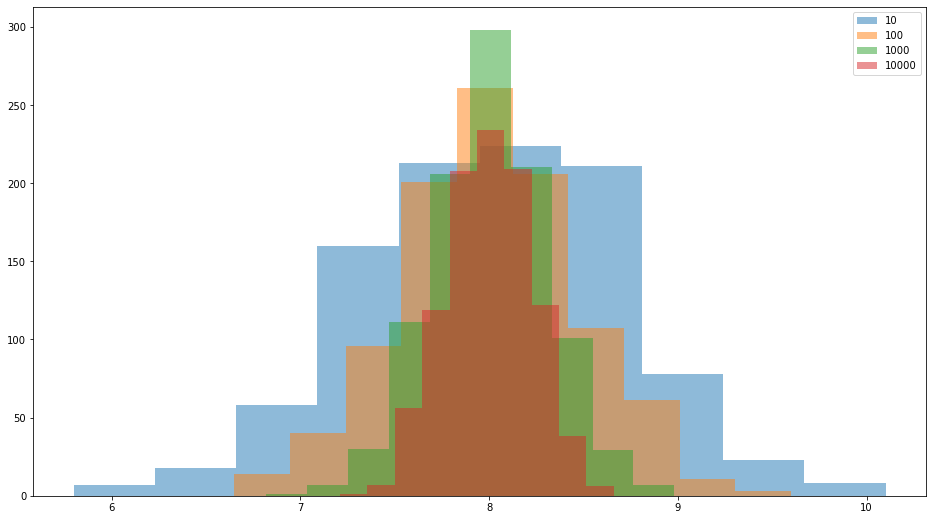

In [30]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
         means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [31]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 1])

Text(0.5, 0, '$x$')

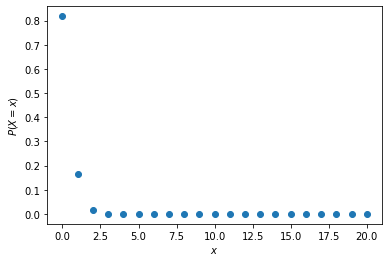

In [32]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

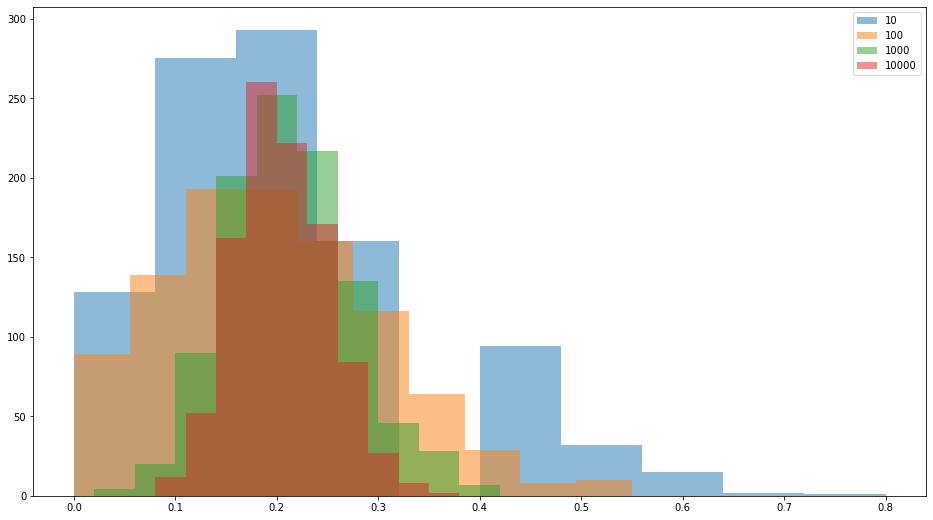

In [33]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
    means = []
    for i in range(1000):
        means.append(np.mean(binomial_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()